# import

In [1]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [14]:
df_dataset = pd.read_csv('dataset/dataset/faults.csv')

In [15]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

- 결측치 X
- 0:27 독립변수, 27:-1 종속변수 (총 7개)


**min max normalization**
$$x_{new} = \frac{x-x_{min}}{x_{max} - x_{min}}$$ 

In [16]:
# 수식 코드화

faults_norm = (df_dataset - df_dataset.min()) / (df_dataset.max() - df_dataset.min())
faults_norm.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,0.334977,0.359254,0.126645,0.126648,0.012393,0.010515,0.004516,0.017778,0.416496,0.431452,...,0.541831,0.528699,0.529422,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,0.305390,0.291180,0.136706,0.136707,0.033858,0.028832,0.023496,0.044197,0.158297,0.086532,...,0.252619,0.090656,0.385303,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029912,0.110006,0.035786,0.035788,0.000537,0.001244,0.000661,0.000800,0.310345,0.402778,...,0.331719,0.489884,0.146652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.255132,0.270919,0.092244,0.092244,0.001127,0.002297,0.001322,0.001635,0.443350,0.416667,...,0.547839,0.527666,0.439614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.617595,0.624927,0.167658,0.167658,0.005372,0.007849,0.004518,0.007140,0.522167,0.476852,...,0.757855,0.568129,0.999773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# 데이터 섞기

faults_shuffle = faults_norm.sample(frac=1)
faults_shuffle.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
1468,0.438123,0.441194,0.072601,0.072600,0.000452,0.001149,0.000386,0.000649,0.472906,0.412037,...,0.362284,0.520232,0.084449,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1039,0.547214,0.548274,0.020423,0.020423,0.000236,0.000670,0.000331,0.000320,0.418719,0.379630,...,0.436778,0.495856,0.049035,0.0,0.0,0.0,0.0,0.0,1.0,0.0
400,0.000000,0.222352,0.038843,0.038859,0.137790,0.096966,0.032230,0.217343,0.118227,0.490741,...,0.283099,0.569531,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
413,0.024047,0.133411,0.064556,0.064570,0.133053,0.072078,0.027326,0.207083,0.113300,0.481481,...,0.494528,0.561974,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
302,0.062757,0.067876,0.163296,0.163296,0.000662,0.001627,0.000661,0.001050,0.551724,0.439815,...,0.499823,0.573614,0.195687,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# 각 행을 numpy array로 변형 (이중 배열)
faults_np =faults_shuffle.to_numpy()
print(type(faults_np))
faults_np[:5]

<class 'numpy.ndarray'>


array([[4.38123167e-01, 4.41193681e-01, 7.26005472e-02, 7.26001327e-02,
        4.52005529e-04, 1.14865512e-03, 3.85653683e-04, 6.48597501e-04,
        4.72906404e-01, 4.12037037e-01, 8.30687831e-01, 0.00000000e+00,
        1.00000000e+00, 7.69230769e-02, 8.84143891e-01, 2.04682699e-01,
        7.25017646e-01, 5.71820677e-03, 7.82568994e-01, 1.00000000e+00,
        0.00000000e+00, 3.17508755e-01, 2.66993617e-01, 2.12060018e-01,
        3.62283754e-01, 5.20231566e-01, 8.44494892e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [5.47214076e-01, 5.48273844e-01, 2.04231601e-02, 2.04227451e-02,
        2.35828972e-04, 6.70048818e-04, 3.30560300e-04, 3.20330210e-04,
        4.18719212e-01, 3.79629630e-01, 8.27160494e-01, 1.00000000e+00,
        0.00000000e+00, 2.30769231e-01, 8.94594051e-01, 3.40502172e-01,
        8.73953817e-01, 3.65965233e-03, 8.87276786e-01, 1.00000000e+00,
        0.00000000e+00,

In [19]:
# hyper params
train_ratio = 0.9
input_cnt   = 27
output_cnt  = 7

In [20]:
# 학습데이터가 끝나는 위치?
train_idx =  int(len(faults_np) * train_ratio)
print("train_idx : ", train_idx)

train_idx :  1746


1941 의 90% 이므로 1746에서 테스트 데이터가 분리된다.

In [21]:
train_X, train_Y = faults_np[:train_idx, :-output_cnt], faults_np[:train_idx, -output_cnt:]     # faults_np[row, col]
test_X, test_Y  = faults_np[train_idx:, :-output_cnt], faults_np[train_idx:, -output_cnt:]

In [22]:
print(train_X.shape)
print(train_Y.shape)

print(test_X.shape)
print(test_Y.shape)

(1746, 27)
(1746, 7)
(195, 27)
(195, 7)


### model abstract # 1

![model abstract](./img/faults_practice_model_guide.png)

In [23]:
# mini batch : tf가 알아서 함

GJ_NET_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='elu', input_shape = (27,)), # 첫 layer에서는 input shape을 tuple 형식으로 알려줘야 한다. units는 케바케
    tf.keras.layers.Dense(units=24, activation='elu'), # units 값 처음에 크게 쌓고 감소시키느냐 반대로 하느냐의 두 방법이 있음. 역시 케바케
    tf.keras.layers.Dense(units=12, activation='elu'),
    tf.keras.layers.Dense(units=7, activation='softmax')
])

### model abstract # 2

![model abstract_2](./img/faults_practice_model_guide_2.png)

- units : p의 개수

In [24]:
GJ_NET_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'categorical_crossentropy')

### 학습

In [25]:
history_1 = GJ_NET_model.fit(train_X, train_Y, epochs=200, batch_size=10)

# history = 학습 결과를 저장하는 변수 (일반적)
# epochs : 몇 번, 몇 세대를 걸쳐서 업데이트 할 것인가?
# mini_batch : batch 한번에 몇 개의 데이터를 넣을 것인가?

# 결과값 숨김

Epoch 1/200
175/175 [==============================] - 0s 503us/step - loss: 1.3339
Epoch 2/200
175/175 [==============================] - 0s 488us/step - loss: 1.0414
Epoch 3/200
175/175 [==============================] - 0s 489us/step - loss: 0.9264
Epoch 4/200
175/175 [==============================] - 0s 489us/step - loss: 0.8583
Epoch 5/200
175/175 [==============================] - 0s 495us/step - loss: 0.8270
Epoch 6/200
175/175 [==============================] - 0s 512us/step - loss: 0.7891
Epoch 7/200
175/175 [==============================] - 0s 494us/step - loss: 0.7708
Epoch 8/200
175/175 [==============================] - 0s 476us/step - loss: 0.7624
Epoch 9/200
175/175 [==============================] - 0s 496us/step - loss: 0.7537
Epoch 10/200
175/175 [==============================] - 0s 477us/step - loss: 0.7363
Epoch 11/200
175/175 [==============================] - 0s 528us/step - loss: 0.7294
Epoch 12/200
175/175 [==============================] - 0s 489us/step - lo

In [26]:
GJ_NET_model.evaluate(test_X, test_Y)

# 학습 시킬때는 성능이 금방 올라가는데 검증 또는 테스트 데이터로 검증하면 성능이 떨어지게 된다.

7/7 [==============================] - 0s 668us/step - loss: 0.6785


0.6785199046134949

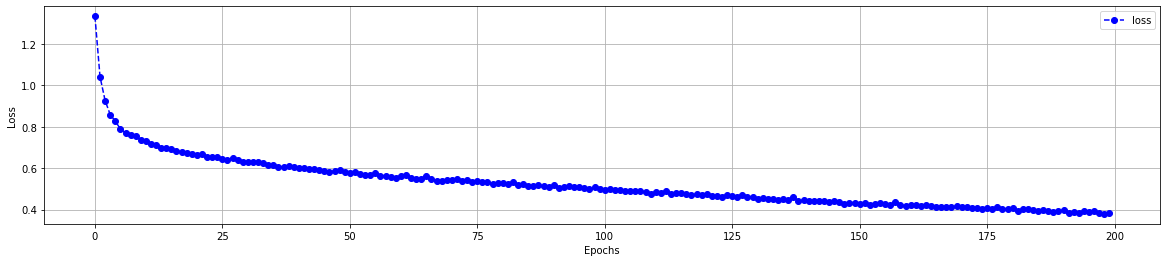

In [27]:
plt.figure(figsize=(20,4))
plt.plot(history_1.history['loss'], 'b--o', label = 'loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.show()

In [28]:
pred_Y = GJ_NET_model.predict(test_X)
print("pred_Y \n ", pred_Y)

pred_Y 
  [[1.42984523e-03 5.04582458e-05 4.92241234e-02 ... 9.32280545e-06
  2.88231997e-03 1.24225542e-01]
 [9.70454380e-07 1.91200916e-02 2.86117978e-02 ... 1.30603466e-08
  6.09374956e-06 9.48875725e-01]
 [1.81967854e-01 1.86300122e-06 2.58927059e-04 ... 1.11273221e-04
  1.93273034e-02 7.98332691e-01]
 ...
 [2.30957359e-01 1.53333202e-01 1.97075796e-08 ... 3.00060143e-03
  1.20675154e-01 4.92033601e-01]
 [7.31769949e-03 5.55739462e-05 1.44079315e-09 ... 9.52499390e-01
  1.85807643e-03 3.82690877e-02]
 [2.42712721e-01 2.01762441e-06 1.76482145e-02 ... 9.63990577e-04
  2.13363003e-02 7.17336535e-01]]


In [29]:
pred_Y = np.argmax(pred_Y, axis = 1)        # argmax?
print("pred_Y : \n", pred_Y)

pred_Y : 
 [3 6 6 2 2 1 2 2 5 2 6 5 2 6 6 6 2 3 4 2 0 0 6 6 4 6 2 1 6 6 2 6 6 0 2 2 1
 6 6 1 6 1 2 0 2 0 2 5 2 1 0 2 1 6 5 5 6 6 6 1 5 0 2 2 0 5 6 2 2 0 0 5 6 0
 5 2 0 6 2 5 6 6 2 1 2 2 6 6 2 2 1 6 6 2 6 0 2 2 4 0 2 6 2 2 6 6 5 5 6 2 6
 6 6 5 6 5 5 6 6 0 1 6 6 6 6 2 2 1 6 1 2 6 6 6 6 1 2 6 0 2 5 6 6 6 1 6 6 6
 1 5 1 6 5 6 0 6 2 6 0 0 4 6 6 5 6 2 5 2 2 2 5 5 2 6 6 6 6 2 6 1 2 5 6 2 2
 5 1 5 6 5 4 6 6 4 6]


In [30]:
test_Y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [31]:
# 위 두 가지를 비교하기 위해 np.equal 을 사용한다. 

np.equal(pred_Y, test_Y)      # 예측한 값, 실제 값

ValueError: operands could not be broadcast together with shapes (195,) (195,7) 